In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.display import Image

Image(url='E:\\SALUJA PROJECT\\REGRESSION\\download.jpg')


In [3]:
df = pd.read_csv("crop_production_filtered.csv", dtype={"Crop_Year": "int16", "Production": "float32"})


In [4]:
df.iloc[2:10]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2001,Whole Year,Sugarcane,81.00,2379.000000
3,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Black pepper,63.00,13.500000
4,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.00,40.000000
5,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Black pepper,75.50,15.860000
6,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,other oilseeds,1.00,0.110000
7,Andaman and Nicobar Islands,SOUTH ANDAMANS,2005,Whole Year,Banana,1656.80,10251.129883
8,Andaman and Nicobar Islands,SOUTH ANDAMANS,2005,Whole Year,Sugarcane,128.02,2448.199951
9,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2006,Whole Year,Black pepper,175.00,191.139999


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     18835 non-null  object 
 1   District_Name  18835 non-null  object 
 2   Crop_Year      18835 non-null  int16  
 3   Season         18835 non-null  object 
 4   Crop           18835 non-null  object 
 5   Area           18835 non-null  float64
 6   Production     18835 non-null  float32
dtypes: float32(1), float64(1), int16(1), object(4)
memory usage: 846.2+ KB


In [6]:
df.describe()


,Crop_Year,Area,Production
count,18835.000000,18835.000000,18835.000000
mean,2005.745208,1290.916116,1710.363159
std,4.937811,2217.352193,3143.314453
min,1997.000000,1.000000,0.010000
25%,2002.000000,55.000000,56.000000
50%,2006.000000,297.000000,330.000000
75%,2010.000000,1374.000000,1727.000000
max,2015.000000,12006.000000,18600.000000


In [7]:
#in this production is the dependent variable rest all are independent variable 

In [8]:
#data preprocessing and cleaning
#step 1 : Remove all those rows where production or complete information is not given
df.dropna(subset=["Production",'State_Name','District_Name','Crop_Year','Area'], axis=0, inplace=True)


In [9]:
df["State_Name"].unique()
# Get unique season names
unique_seasons = df["Season"].unique().tolist()
unique_seasons


['Whole Year ',
 'Kharif     ',
 'Rabi       ',
 'Autumn     ',
 'Summer     ',
 'Winter     ']

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     18835 non-null  object 
 1   District_Name  18835 non-null  object 
 2   Crop_Year      18835 non-null  int16  
 3   Season         18835 non-null  object 
 4   Crop           18835 non-null  object 
 5   Area           18835 non-null  float64
 6   Production     18835 non-null  float32
dtypes: float32(1), float64(1), int16(1), object(4)
memory usage: 846.2+ KB


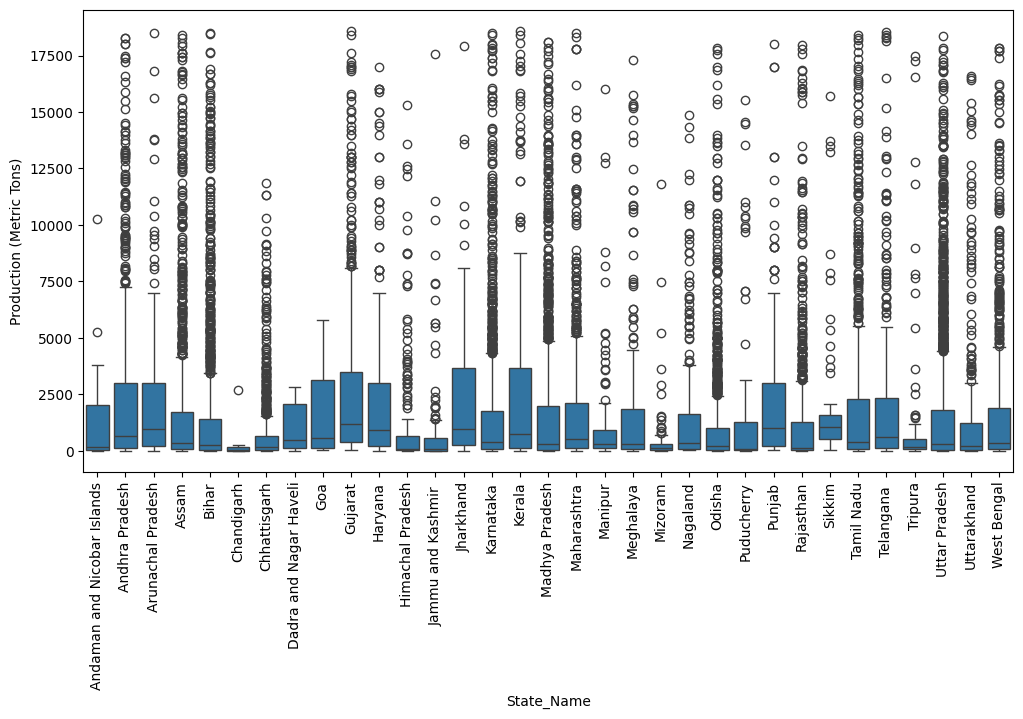

In [11]:
#Graph for State Vs Production
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Adjust figure size
sns.boxplot(x=df["State_Name"], y=df["Production"])

plt.xticks(rotation=90)  # Rotate x-axis labels
plt.ylabel("Production (Metric Tons)")
plt.show()

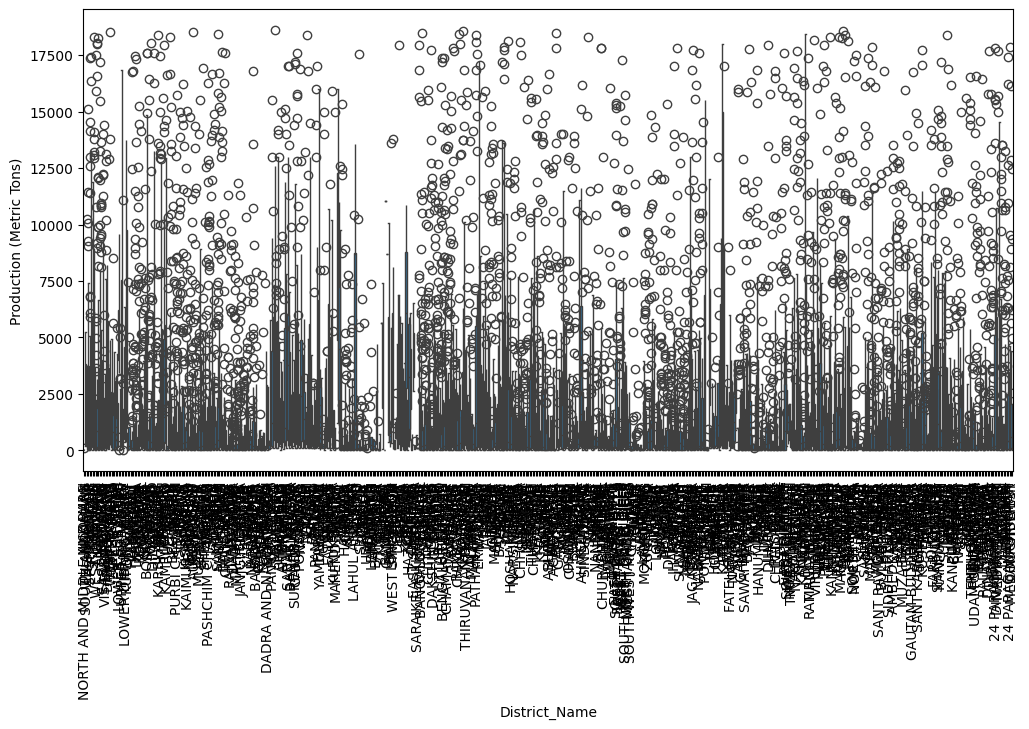

In [12]:
#Graph for District Vs Production
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.boxplot(x=df["District_Name"], y=df["Production"])

plt.xticks(rotation=90)  # Rotate x-axis labels
plt.ylabel("Production (Metric Tons)")
plt.show()

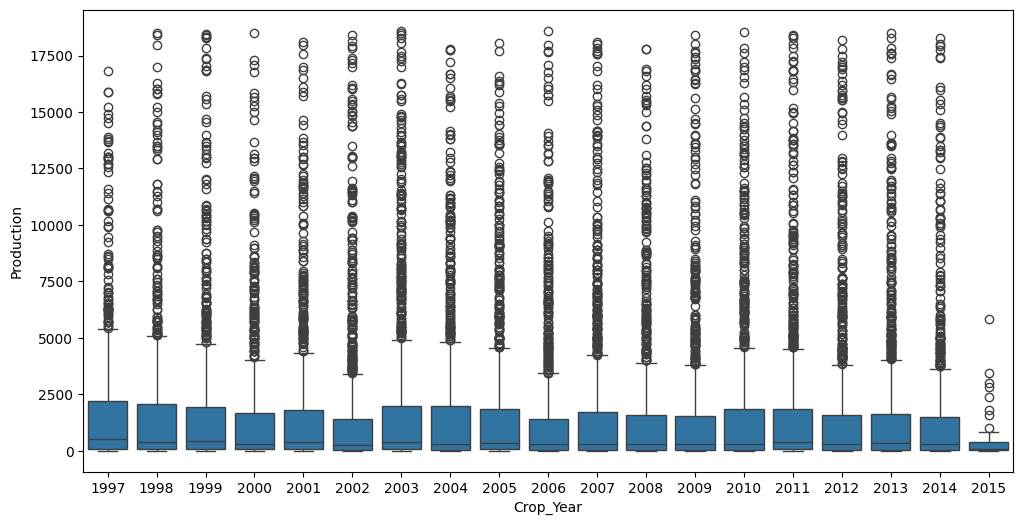

In [13]:
#Graph for CropYear Vs Production
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.boxplot(x=df["Crop_Year"], y=df["Production"])
#plt.xticks(rotation=90)  # Rotate x-axis labels
plt.show()

<Axes: xlabel='Crop_Year'>

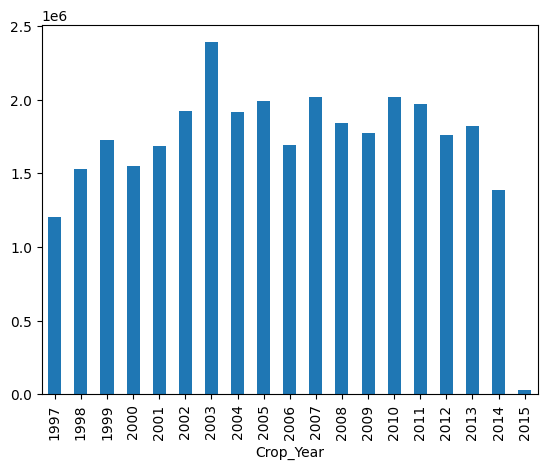

In [14]:
 plt.tick_params(labelsize=10)
df.groupby("Crop_Year")["Production"].agg("sum").plot.bar()

In [15]:
#NOW AFTER COMPLETE ANALYSIS OF DATA SET ,WILL START DOING PREDICTIONS 

In [16]:
#Step 1: Convert categorical columns into numerical values for displaying label encoding and for calculation one hot encoding

from sklearn.preprocessing import LabelEncoder

# Create a dictionary to store label mappings
label_mappings = {}

# Columns to encode
categorical_columns = ['State_Name', 'District_Name', 'Season', 'Crop']

# Apply LabelEncoder and store mappings
df_encoded = df.copy()
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Define features and target
X = df_encoded.drop(columns=['Production'])
y = df_encoded['Production']

# Display mappings for reference
for col, mapping in label_mappings.items():
    print(f"\nLabel Mapping for {col}:")
    for key, value in mapping.items():
        print(f"{value}: {key}")


Label Mapping for State_Name:
0: Andaman and Nicobar Islands
1: Andhra Pradesh
2: Arunachal Pradesh
3: Assam
4: Bihar
5: Chandigarh
6: Chhattisgarh
7: Dadra and Nagar Haveli
8: Goa
9: Gujarat
10: Haryana
11: Himachal Pradesh
12: Jammu and Kashmir 
13: Jharkhand
14: Karnataka
15: Kerala
16: Madhya Pradesh
17: Maharashtra
18: Manipur
19: Meghalaya
20: Mizoram
21: Nagaland
22: Odisha
23: Puducherry
24: Punjab
25: Rajasthan
26: Sikkim
27: Tamil Nadu
28: Telangana 
29: Tripura
30: Uttar Pradesh
31: Uttarakhand
32: West Bengal

Label Mapping for District_Name:
0: 24 PARAGANAS NORTH
1: 24 PARAGANAS SOUTH
2: ADILABAD
3: AGAR MALWA
4: AGRA
5: AHMADABAD
6: AHMEDNAGAR
7: AIZAWL
8: AJMER
9: AKOLA
10: ALAPPUZHA
11: ALIGARH
12: ALIRAJPUR
13: ALLAHABAD
14: ALMORA
15: ALWAR
16: AMBALA
17: AMBEDKAR NAGAR
18: AMETHI
19: AMRAVATI
20: AMRELI
21: AMRITSAR
22: AMROHA
23: ANAND
24: ANANTAPUR
25: ANANTNAG
26: ANJAW
27: ANUGUL
28: ANUPPUR
29: ARARIA
30: ARIYALUR
31: ARWAL
32: ASHOKNAGAR
33: AURAIYA
34: AURANG

In [30]:
#Step 1: Convert categorical columns into numerical values:

from sklearn.preprocessing import LabelEncoder

# Step 1: Convert categorical columns into numerical values using pd.get_dummies
df_encoded = pd.get_dummies(df, columns=['State_Name', 'District_Name', 'Season', 'Crop'])

# Define features and target
X = df_encoded.drop(columns=['Production'])
y = df_encoded['Production']

In [18]:
#Step 2: Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Check for NaN values
print(df_encoded.isnull().sum())

# Drop rows with NaN in 'Production' (target) or features
df_cleaned = df_encoded.dropna(subset=['Production'])

# Re-encode and split
X_cleaned = df_cleaned.drop(columns=['Production'])
y_cleaned = df_cleaned['Production']

# Split the cleaned data
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.15, random_state=55)




Crop_Year                                 0
Area                                      0
Production                                0
State_Name_Andaman and Nicobar Islands    0
State_Name_Andhra Pradesh                 0
                                         ..
Crop_Urad                                 0
Crop_Varagu                               0
Crop_Wheat                                0
Crop_other misc. pulses                   0
Crop_other oilseeds                       0
Length: 781, dtype: int64


Linear Regression Performance:
MAE(model's predictions are off by ___units of production): 1285.7861870458476
MSE(average of the squared differences between predicted and actual values:) 4395869.069468905
R2 Score(only __ of the variance in Production is explained by the model): 0.5731401566706531


Text(0.5, 1.0, 'Linear Regression: Actual vs. Predicted')

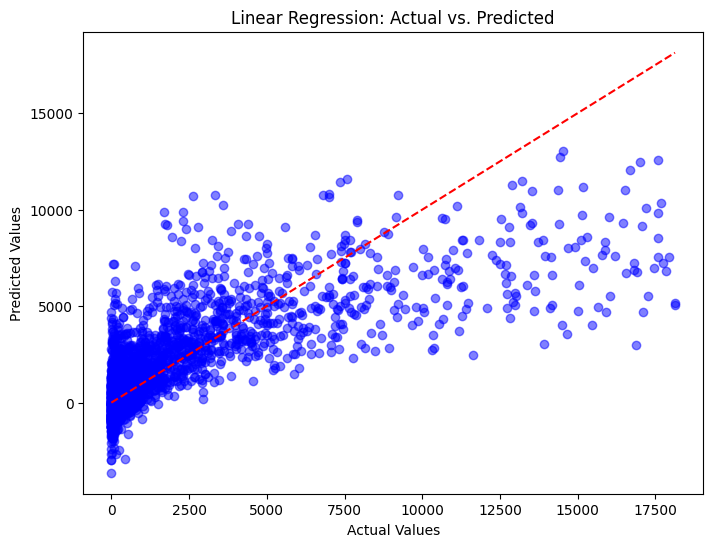

In [19]:
#Step 3: Train Regression Models
#1. Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluate
print("Linear Regression Performance:")
print("MAE(model's predictions are off by ___units of production):", mean_absolute_error(y_test, y_pred))
print("MSE(average of the squared differences between predicted and actual values:)", mean_squared_error(y_test, y_pred))
print("R2 Score(only __ of the variance in Production is explained by the model):", r2_score(y_test, y_pred))
# Scatter Plot: Actual vs. Predicted Values for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Perfect Fit")  # Reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs. Predicted")


Decision Tree Performance:
MAE: 747.7540161060901
MSE: 3302139.1309971474
R2 Score: 0.6793465478990153


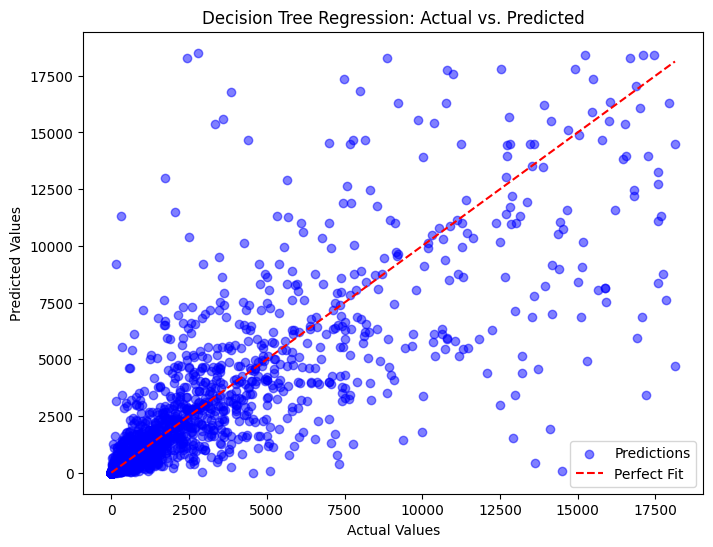

In [20]:
    #2. Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Train model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluate
print("Decision Tree Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_dt, color="blue", alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Perfect Fit")  # Reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree Regression: Actual vs. Predicted")
plt.legend()
plt.show()


Random Forest Performance:
MAE: 632.4746148746123
MSE: 2195276.9650512217
R2 Score: 0.7868281410211558


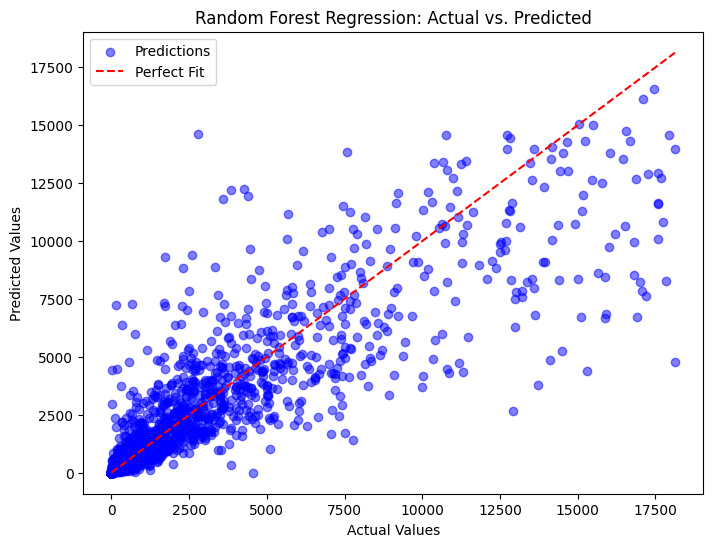

In [21]:
from sklearn.ensemble import RandomForestRegressor # 200 trees and 15 depth maximum
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Train model
rf = RandomForestRegressor(n_estimators=20, random_state=42)  # Use fewer trees to save memory
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color="blue", alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Perfect Fit")  # Reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regression: Actual vs. Predicted")
plt.legend()
plt.show()

Gradient Boosting Performance:
MAE: 858.4635874983026
MSE: 2793062.695439267
R2 Score: 0.7287802967415742


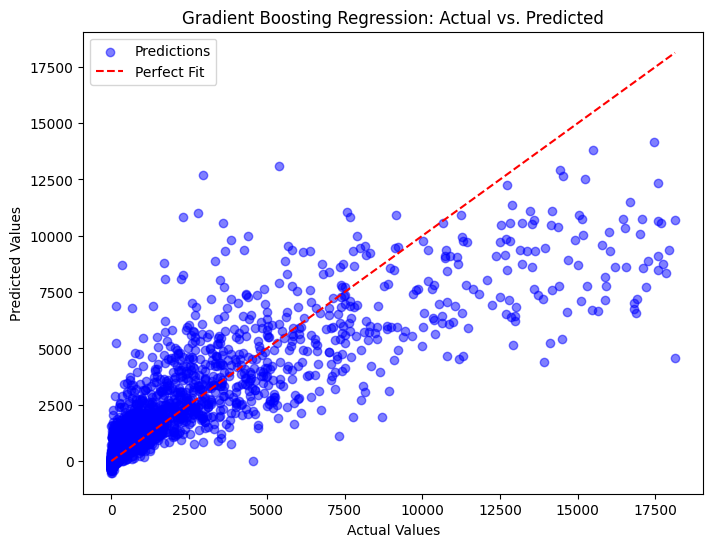

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Train Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# Predictions
y_pred_gb = gb.predict(X_test)

# Evaluation
print("Gradient Boosting Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))
print("R2 Score:", r2_score(y_test, y_pred_gb))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color="blue", alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Perfect Fit")  # Reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regression: Actual vs. Predicted")
plt.legend()
plt.show()

XGBoost Performance:
MAE: 819.4379
MSE: 2690183.5
R2 Score: 0.7387703657150269


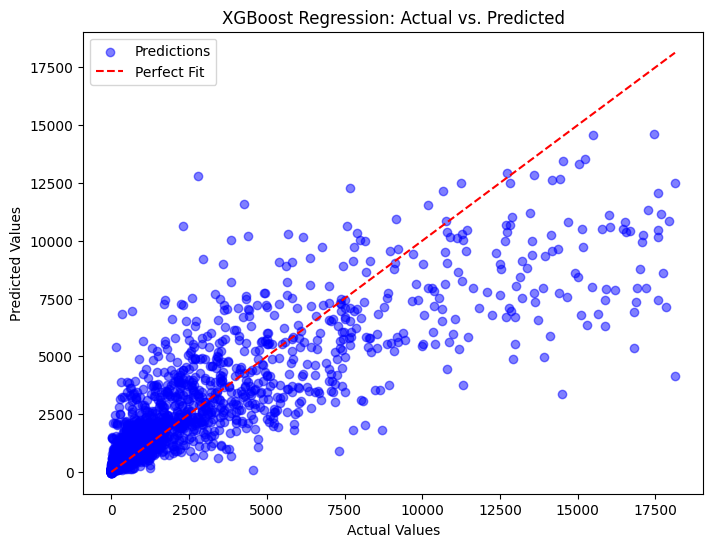

In [24]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Train XGBoost
xgb = XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R2 Score:", r2_score(y_test, y_pred_xgb))
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color="blue", alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Perfect Fit")  # Reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("XGBoost Regression: Actual vs. Predicted")
plt.legend()
plt.show()


SVM Regression Performance:
MAE (model's predictions are off by ___ units of production): 1298.1348127701847
MSE (average of the squared differences between predicted and actual values): 9400591.411133312
R2 Score (only __ of the variance in Production is explained by the model): 0.08715775798928083


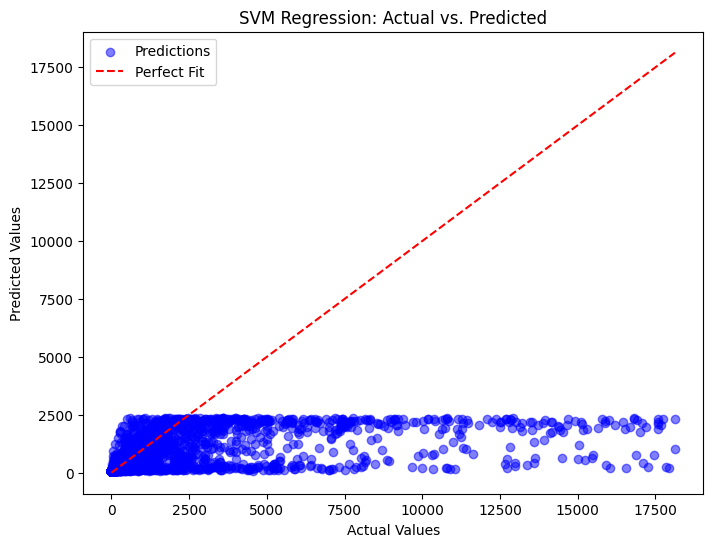

In [25]:
# Step 3: Train Regression Models
# 2. Support Vector Machine (SVM) Regression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train model
svm = SVR(kernel='rbf')  # Using the Radial Basis Function (RBF) kernel
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)

# Evaluate
print("SVM Regression Performance:")
print("MAE (model's predictions are off by ___ units of production):", mean_absolute_error(y_test, y_pred_svm))
print("MSE (average of the squared differences between predicted and actual values):", mean_squared_error(y_test, y_pred_svm))
print("R2 Score (only __ of the variance in Production is explained by the model):", r2_score(y_test, y_pred_svm))

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svm, color="blue", alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed", label="Perfect Fit")  # Reference line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("SVM Regression: Actual vs. Predicted")
plt.legend()
plt.show()


In [26]:
import time
from sklearn.svm import SVR

svm = SVR(kernel='rbf')

start_time = time.time()
svm.fit(X_train, y_train)
end_time = time.time()

print(f"Training Time: {end_time - start_time:.2f} seconds")


Training Time: 119.64 seconds


In [28]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
print("LightGBM R² Score:", r2_score(y_test, y_pred_lgbm))


C:\Users\Dipanshu Khanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Dipanshu Khanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Dipanshu Khanna\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dipanshu Khanna\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(arg

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1271
[LightGBM] [Info] Number of data points in the train set: 16009, number of used features: 500
[LightGBM] [Info] Start training from score 1700.112927
LightGBM R² Score: 0.7851150042459177


In [31]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Load dataset (Ensure this matches your original dataset)
df = pd.read_csv("crop_production_filtered.csv")

# Encode categorical variables properly
categorical_cols = ["State_Name", "District_Name", "Season", "Crop"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categories to numbers
    label_encoders[col] = le  # Store for later use

# Define features and target
X = df.drop(columns=["Production"])
y = df["Production"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=55)

# Train the Random Forest Model
rf = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

# Save model and encoders for deployment
with open("rf_model.pkl", "wb") as model_file:
    pickle.dump(rf, model_file)

with open("label_encoders.pkl", "wb") as encoder_file:
    pickle.dump(label_encoders, encoder_file)

# Test with a sample input
sample_input = X_test.iloc[0].values.reshape(1, -1)
predicted_value = rf.predict(sample_input)
print("Predicted Production:", predicted_value[0])


Predicted Production: 7.095653350942017


C:\Users\Dipanshu Khanna\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


C:\Users\Dipanshu Khanna\AppData\Local\Temp\ipykernel_15800\2826788372.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MAE", data=results_df, palette="coolwarm")


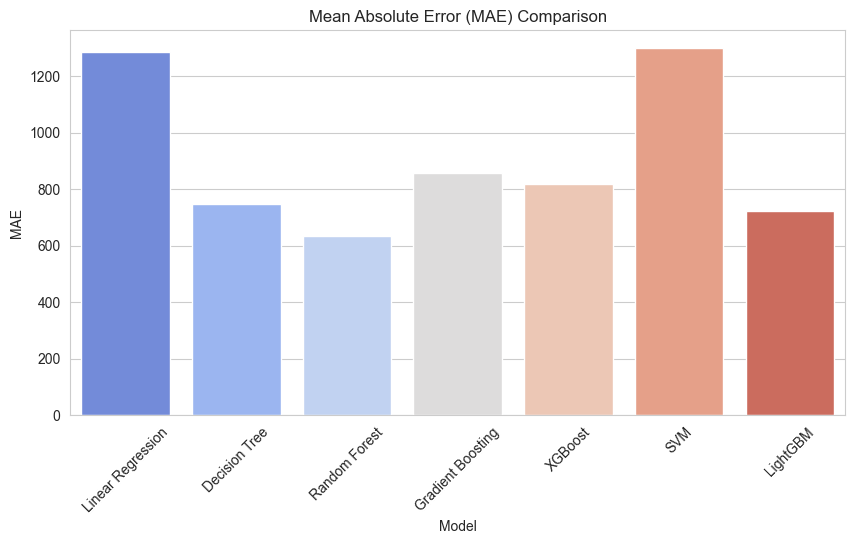

C:\Users\Dipanshu Khanna\AppData\Local\Temp\ipykernel_15800\2826788372.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="MSE", data=results_df, palette="coolwarm")


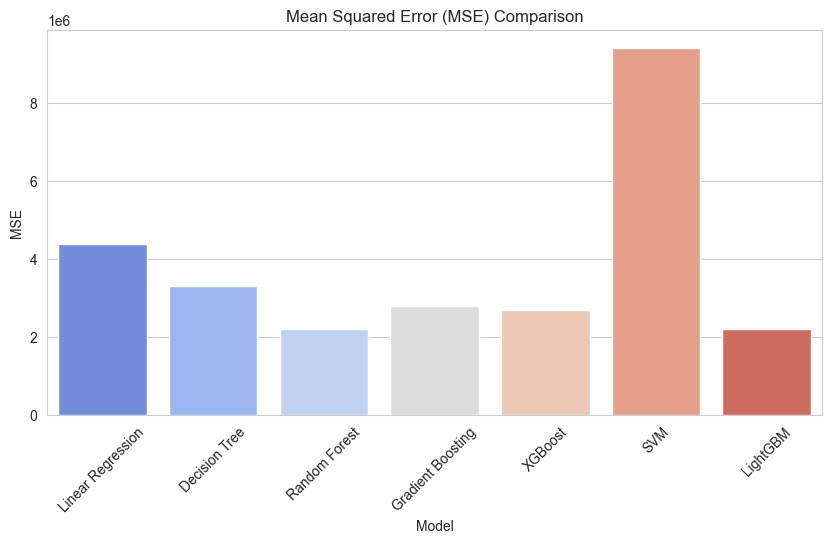

C:\Users\Dipanshu Khanna\AppData\Local\Temp\ipykernel_15800\2826788372.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R² Score", data=results_df, palette="coolwarm")


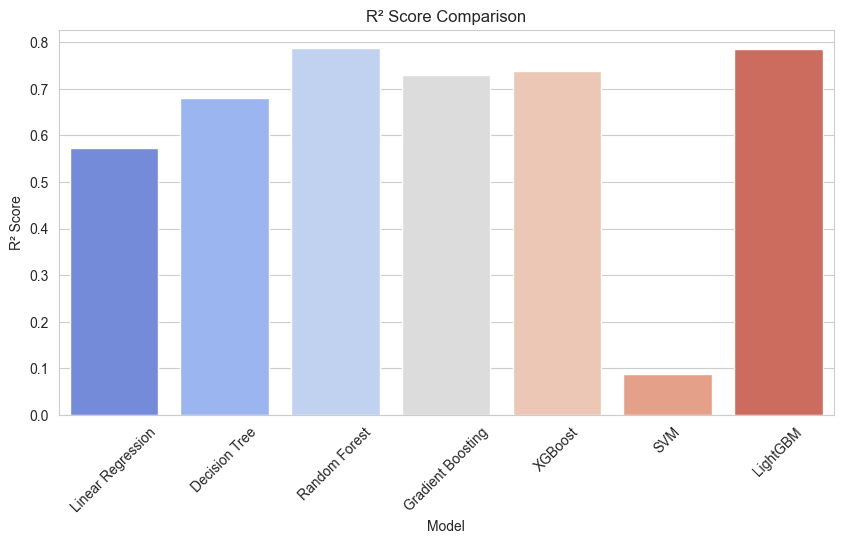

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Store evaluation metrics
model_names = ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost", "SVM", "LightGBM"]
mae_values = [
    mean_absolute_error(y_test, y_pred),
    mean_absolute_error(y_test, y_pred_dt),
    mean_absolute_error(y_test, y_pred_rf),
    mean_absolute_error(y_test, y_pred_gb),
    mean_absolute_error(y_test, y_pred_xgb),
    mean_absolute_error(y_test, y_pred_svm),
    mean_absolute_error(y_test, y_pred_lgbm)
]
mse_values = [
    mean_squared_error(y_test, y_pred),
    mean_squared_error(y_test, y_pred_dt),
    mean_squared_error(y_test, y_pred_rf),
    mean_squared_error(y_test, y_pred_gb),
    mean_squared_error(y_test, y_pred_xgb),
    mean_squared_error(y_test, y_pred_svm),
    mean_squared_error(y_test, y_pred_lgbm)
]
r2_values = [
    r2_score(y_test, y_pred),
    r2_score(y_test, y_pred_dt),
    r2_score(y_test, y_pred_rf),
    r2_score(y_test, y_pred_gb),
    r2_score(y_test, y_pred_xgb),
    r2_score(y_test, y_pred_svm),
    r2_score(y_test, y_pred_lgbm)
]

# Convert to DataFrame
results_df = pd.DataFrame({
    "Model": model_names,
    "MAE": mae_values,
    "MSE": mse_values,
    "R² Score": r2_values
})

# Set plot style
sns.set_style("whitegrid")

# Plot MAE
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="MAE", data=results_df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Mean Absolute Error (MAE) Comparison")
plt.show()

# Plot MSE
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="MSE", data=results_df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Mean Squared Error (MSE) Comparison")
plt.show()

# Plot R² Score
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="R² Score", data=results_df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("R² Score Comparison")
plt.show()
